In [26]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# function that reads the contents of a file
# and returns a list of lines
def read_file(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()

    # for each line, take only the string after '\t' and before '\n'
    lines = [x.split('\t')[1].split('\n')[0] for x in lines]

    return lines

def levenshtein_distance(s1, s2):
    # Create a matrix to store the distances between substrings of s1 and s2
    dp = [[0] * (len(s2) + 1) for _ in range(len(s1) + 1)]

    # Initialize the first row and column of the matrix
    for i in range(len(s1) + 1):
        dp[i][0] = i
    for j in range(len(s2) + 1):
        dp[0][j] = j

    # Fill in the matrix using dynamic programming
    for i in range(1, len(s1) + 1):
        for j in range(1, len(s2) + 1):
            cost = 0 if s1[i - 1] == s2[j - 1] else 1
            dp[i][j] = min(
                dp[i - 1][j] + 1,  # Deletion
                dp[i][j - 1] + 1,  # Insertion
                dp[i - 1][j - 1] + cost  # Substitution
            )

    # The final value in the bottom-right corner of the matrix is the Levenshtein distance
    return dp[len(s1)][len(s2)]

# grab the name of files in the directory 'chrom'
# excluding the file with 'html' extension
# and store the names in a list

chrom_files = glob.glob('chrom/*')
chrom_files = [x for x in chrom_files if 'html' not in x]
print(f'# of files: {len(chrom_files)}')

# files ending with a are training data
# files ending with b are testing data

# list of training data
train_files = [x for x in chrom_files if 'a' in x]
print(f'# of training files: {len(train_files)}')

# list of testing data
test_files = [x for x in chrom_files if 'b' in x]
print(f'# of testing files:  {len(test_files)}')

# read all the training data
training_data = [read_file(x) for x in train_files]
# flatten the list of lists
training_data = [item for sublist in training_data for item in sublist]
print(f'# of training data: {len(training_data)}')

# read all the testing data
test_data = [read_file(x) for x in test_files]
# flatten the list of lists
test_data = [item for sublist in test_data for item in sublist]
print(f'# of testing data: {len(test_data)}')

# of files: 44
# of training files: 22
# of testing files:  22
# of training data: 2200
# of testing data: 2200


In [27]:
def cross_validation(train_data, test_data, k_num = 2, fold=20):
    # shuffle data before cross validation
    np.random.shuffle(train_data)
    np.random.shuffle(test_data)
    fold_size = len(train_data) // fold

    for i in range(fold):
        print(f'Fold {i + 1}:')
        # take one fold as training data
        data_train_fold = train_data[i * fold_size: (i + 1) * fold_size]
        data_test_fold = test_data[i * fold_size: (i + 1) * fold_size]

        # create a graph
        G = nx.Graph()

        # add nodes to the graph
        for node in data_train_fold:
            G.add_node(node)

        # add edges to the graph
        for node1 in data_train_fold:
            for node2 in data_train_fold:
                if node1 != node2:
                    # compute the Levenshtein distance between node1 and node2
                    dist = levenshtein_distance(node1, node2)
                    if dist <= k_num:
                        G.add_edge(node1, node2)

        # display the graph
        nx.draw_networkx(G, with_labels=False, pos=nx.spring_layout(G), node_size=50, edge_color='b')
        plt.show()

Fold 1:


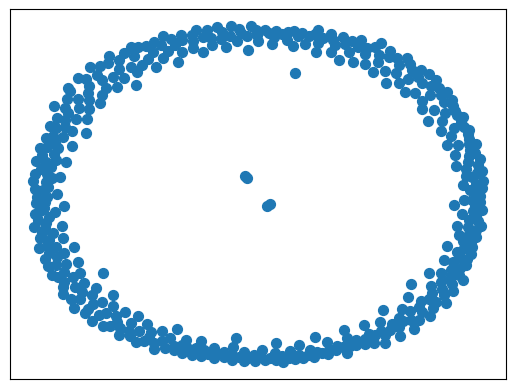

Fold 2:


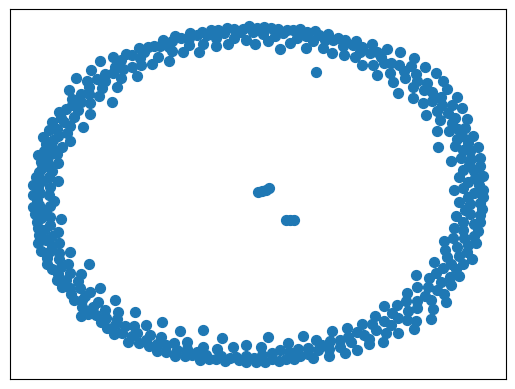

Fold 3:


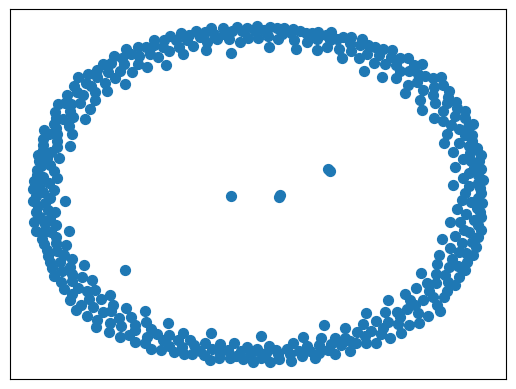

Fold 4:


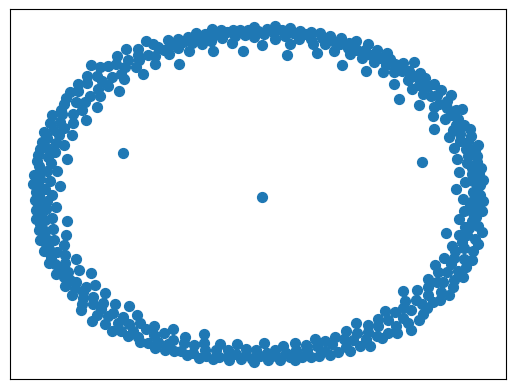

Fold 5:


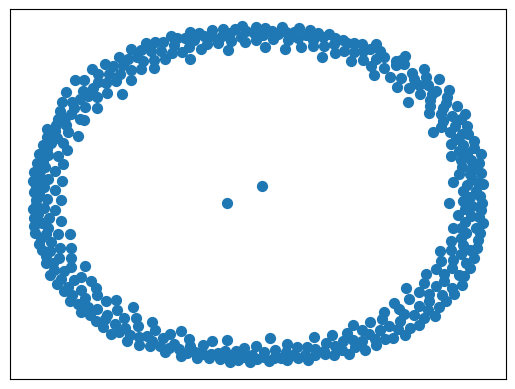

In [28]:
cross_validation(training_data, test_data, k_num=2, fold=5)